In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model


In [0]:
#Load in data

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print("x_train.shape:",x_train.shape)


x_train.shape: (60000, 28, 28)


In [0]:
#convolution expects h*w*c
x_train= np.expand_dims(x_train,-1)
x_test= np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
#no of classes
k= len(set(y_train))
print("no of classes:",k)


no of classes: 10


In [0]:
#build the model

i= Input(shape= x_train[0].shape)
x= Conv2D(32, (3,3), strides=2, activation='relu')(i)
x= Conv2D(64, (3,3), strides=2, activation='relu')(x)
x= Conv2D(128, (3,3), strides=2, activation='relu')(x)
x= Flatten()(x)
x= Dropout(0.2)(x)
x= Dense(512,activation='relu')(x)
x= Dropout(0.2)(x)
x= Dense(k, activation='softmax')(x)

model= Model(i,x)

In [0]:
#Compile and Fit
#Need GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r= model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=15)


Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5253 - accuracy: 0.8054 - val_loss: 0.3970 - val_accuracy: 0.8546
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3659 - accuracy: 0.8632 - val_loss: 0.3566 - val_accuracy: 0.8701
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3160 - accuracy: 0.8817 - val_loss: 0.3229 - val_accuracy: 0.8784
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2848 - accuracy: 0.8910 - val_loss: 0.3002 - val_accuracy: 0.8910
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2571 - accuracy: 0.9039 - val_loss: 0.3026 - val_accuracy: 0.8912
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2362 - accuracy: 0.9112 - val_loss: 0.3007 - val_accuracy: 0.8918
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9171 - val_loss: 0.3053 - val_accuracy:

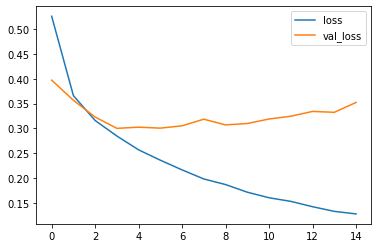

In [0]:
#plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

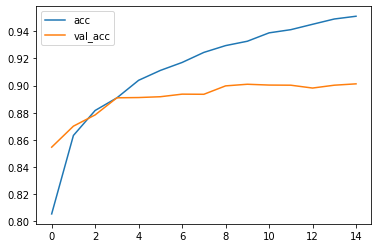

In [0]:
#plot accuracy per iteration
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[851   5  17  18   2   3  97   0   7   0]
 [  1 984   1   9   1   0   2   0   2   0]
 [ 24   1 843   9  46   0  75   0   2   0]
 [ 12   8  15 894  26   2  41   0   2   0]
 [  2   2  51  17 822   0 103   0   3   0]
 [  0   0   0   0   0 983   0  15   0   2]
 [115   5  64  19  53   0 737   0   7   0]
 [  0   0   0   0   0  11   0 958   0  31]
 [  3   1   3   5   1   1   6   4 974   2]
 [  1   0   0   0   0   7   0  25   0 967]]


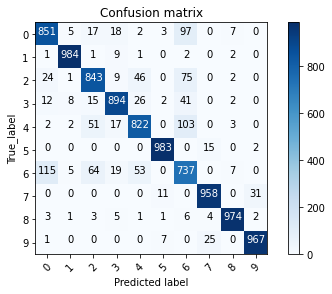

In [0]:
#plot Confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
  #this function prints and plots the confusion matrix
  if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f'if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True_label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
#labels mapping
labels= '''Tshirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

TypeError: ignored

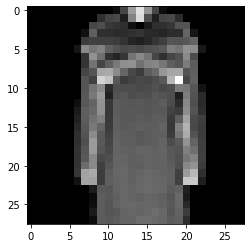

In [0]:
# Misclassified examples
misclassified_idx = np.where(p_test !=y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i],p_test[i],labels[y_test[i]],labels[p_test[i]]));